<a href="https://colab.research.google.com/github/Kamrankhan69/Classification-on-Diabetes-Dataset/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/datasets/diabetes.csv'

In [ ]:
import pandas as pd
data = pd.read_csv(path, header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    768 non-null    int64  
 1   col2    768 non-null    int64  
 2   col3    768 non-null    int64  
 3   col4    768 non-null    int64  
 4   col5    768 non-null    int64  
 5   col6    768 non-null    float64
 6   col7    768 non-null    float64
 7   col8    768 non-null    int64  
 8   y       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.dropna()

,col1,col2,col3,col4,col5,col6,col7,col8,y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
import numpy as np

X = data.drop("y",axis=1)
y = data["y"]

print('Class labels:', np.unique(y))

Class labels: [0 1]


Text(0, 0.5, 'Frequency of diabetes diagnosis')

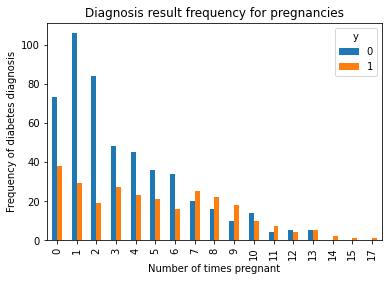

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(data.col1,data.y).plot(kind='bar')
plt.title('Diagnosis result frequency for pregnancies')
plt.xlabel('Number of times pregnant')
plt.ylabel('Frequency of diabetes diagnosis')

Text(0, 0.5, 'Frequency of diabetes diagnosis')

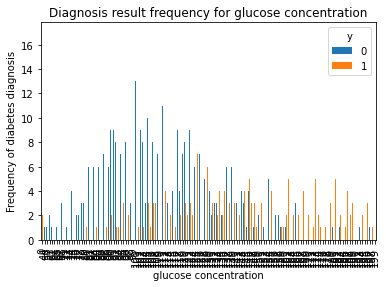

In [ ]:
pd.crosstab(data.col2,data.y).plot(kind='bar')
plt.title('Diagnosis result frequency for glucose concentration')
plt.xlabel('glucose concentration')
plt.ylabel('Frequency of diabetes diagnosis')

Text(0, 0.5, 'Frequency of diabetes diagnosis')

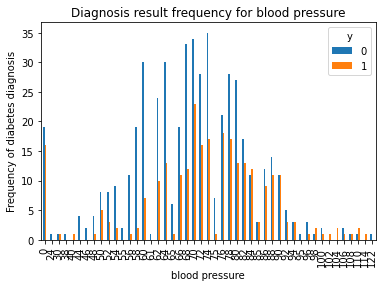

In [ ]:
pd.crosstab(data.col3,data.y).plot(kind='bar')
plt.title('Diagnosis result frequency for blood pressure')
plt.xlabel('blood pressure')
plt.ylabel('Frequency of diabetes diagnosis')

Text(0, 0.5, 'Frequency of diabetes diagnosis')

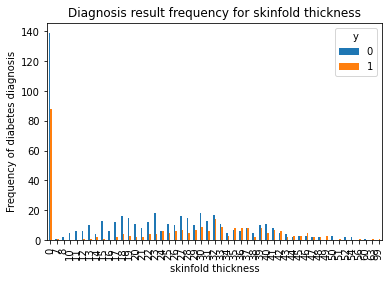

In [ ]:
pd.crosstab(data.col4,data.y).plot(kind='bar')
plt.title('Diagnosis result frequency for skinfold thickness')
plt.xlabel('skinfold thickness')
plt.ylabel('Frequency of diabetes diagnosis')

Text(0, 0.5, 'Frequency of diabetes diagnosis')

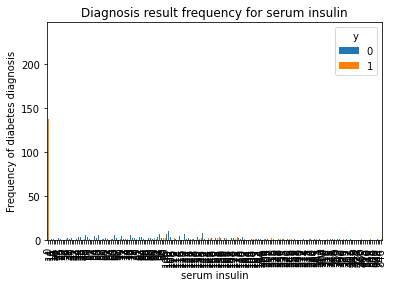

In [ ]:
pd.crosstab(data.col5,data.y).plot(kind='bar')
plt.title('Diagnosis result frequency for serum insulin')
plt.xlabel('serum insulin')
plt.ylabel('Frequency of diabetes diagnosis')

Text(0, 0.5, 'Frequency of diabetes diagnosis')

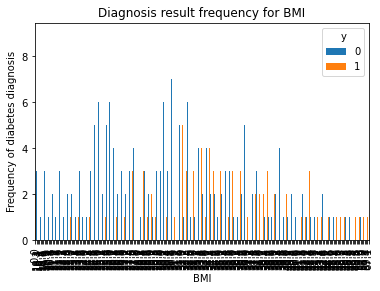

In [ ]:
pd.crosstab(data.col6,data.y).plot(kind='bar')
plt.title('Diagnosis result frequency for BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency of diabetes diagnosis')

Text(0, 0.5, 'Frequency of diabetes diagnosis')

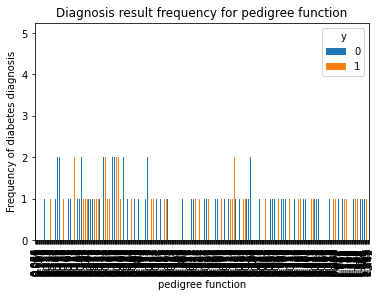

In [ ]:
pd.crosstab(data.col7,data.y).plot(kind='bar')
plt.title('Diagnosis result frequency for pedigree function')
plt.xlabel('pedigree function')
plt.ylabel('Frequency of diabetes diagnosis')

Text(0, 0.5, 'Frequency of diabetes diagnosis')

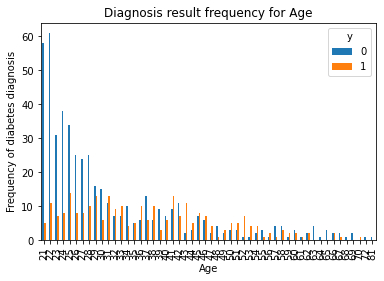

In [ ]:
pd.crosstab(data.col8,data.y).plot(kind='bar')
plt.title('Diagnosis result frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency of diabetes diagnosis')

**Splitting data in test and train**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [500 268]
Labels count in y_train: [350 187]
Labels count in y_test: [150  81]


**Features standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**Train perceptron using scikit-learn**

In [ ]:
X_train_std

array([[ 0.34465946, -0.38671385, -0.37384622, ...,  0.50262067,
         0.09726391, -0.70240039],
       [-0.83986618, -0.76015669,  0.05998505, ...,  0.80895513,
        -0.78111194, -0.2775423 ],
       [ 1.23305369, -0.66679598,  0.27690069, ...,  0.9821007 ,
         0.53348435,  0.82708873],
       ...,
       [ 1.82531652,  0.23569088, -0.37384622, ...,  1.22184071,
        -0.11936257,  0.40223064],
       [-1.13599759, -0.88463764, -0.48230404, ..., -0.4430205 ,
         0.15067866, -0.95731525],
       [-0.54373477,  1.1070575 ,  0.27690069, ...,  0.9821007 ,
        -1.03038077, -0.2775423 ]])

# **Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 93


In [ ]:
y_test

397    1
247    0
161    0
585    0
552    0
      ..
436    0
67     0
409    1
195    1
160    0
Name: y, Length: 231, dtype: int64

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.597


**score method does it directly**

In [ ]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.597


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[79 71]
 [22 59]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63       150
           1       0.45      0.73      0.56        81

    accuracy                           0.60       231
   macro avg       0.62      0.63      0.59       231
weighted avg       0.67      0.60      0.60       231



# **AdaLine**

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        The seed of the pseudo random number generator.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)

            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)

            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [ ]:
ada = AdalineGD(n_iter=50, eta=0.001)
ada.fit(X_train_std, y_train)


y_pred = ada.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Misclassified samples: 151
Accuracy: 0.35


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0   0   0]
 [ 22   0 128]
 [  1   0  80]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       150
           1       0.38      0.99      0.55        81

    accuracy                           0.35       231
   macro avg       0.13      0.33      0.18       231
weighted avg       0.13      0.35      0.19       231



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

# **Logistic Regression**

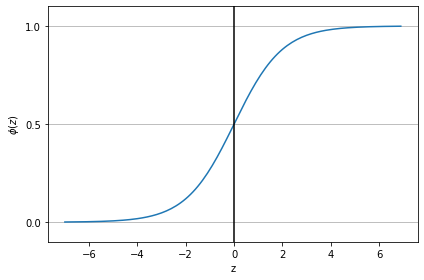

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

**Learning weights of Logistic Regression**

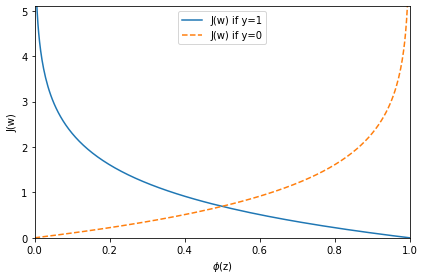

In [ ]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

In [ ]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [ ]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log


**Training logistic regression with scikit-learn**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [ ]:
lr.predict_proba(X_test_std[:3, :])

array([[0.80408291, 0.19591709],
       [0.20172305, 0.79827695],
       [0.6857557 , 0.3142443 ]])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([0, 1, 0])

In [ ]:
lr.predict(X_test_std[:3, :])

array([0, 1, 0])

**Step-by-Step: Learning to use Logistic Regression**

**neccessary imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Visualize the data

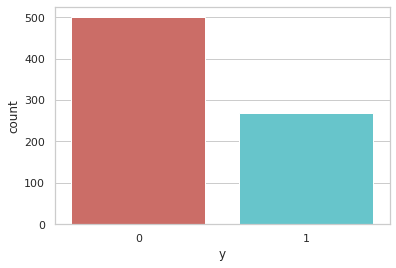

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 65.10416666666666
percentage of subscription 34.89583333333333


In [ ]:
data.groupby('y').mean()

,col1,col2,col3,col4,col5,col6,col7,col8
y,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[141  16]
 [ 35  39]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



# **Summary**

As the Accuracy, confusion matrix, Classification report shown in the respective algorithm session
The accuracy of Perceptron is 59%, logistic Regression is 78% and Adaline is 32%. In this case we can say that Logistic regression is best among these algorithms